# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [46]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [47]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [48]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [49]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

To test for a signifigant difference in the call back rate of the two populations we will apply a permutation test. Our Null hypothesis for this procedure is that race is not a predicter of callback rate. our alternative hypothesis is that race is a factor in predicting call. to test this we will observe the how likely it is that we would see the kind of data we have given the assumtion that race is not a factor in hiring. we will bootstrap and count how many of these samples have a greater mean for the white than the black samples.

In [50]:
data[data['call']==1].shape

(392, 65)

In [51]:
white = data[data.race=='w']
black = data[data.race=='b']

In [52]:
# Your solution to Q3 here
White_Call_Rate = np.sum(white['call']) /len(white)
Black_Call_Rate = np.sum(black['call']) /len(black)
print('from a naive persective the call back rates for whites is: ',White_Call_Rate,' while the black call back rate is: ',Black_Call_Rate)

('from a naive persective the call back rates for whites is: ', 0.096509240246406572, ' while the black call back rate is: ', 0.064476386036960986)


**So the call back rate for whites is 9.5% while the call back rates for blacks is 6.5%, this would indicate discrimination but lets ask in what percent of the of trails would we expect to see a result like this. we will bootstrap random samples then compare the black and white mean.**

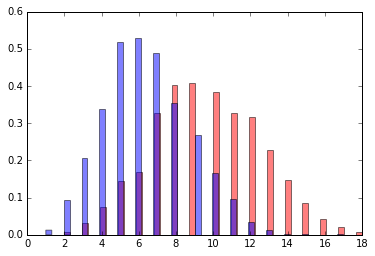

In [55]:
#generate 1000 bootstraps then compare the call back rates
bs_white = np.empty(1000)
bs_black = np.empty(1000)
for i in range(1000):
    bs_white[i] = np.sum(np.random.choice(white['call'],size=100))
    bs_black[i] = np.sum(np.random.choice(black['call'],size=100))
    
_ = plt.hist(bs_white,bins = 50,color ='red',alpha=.5,normed =True)
_ = plt.hist(bs_black,bins =50,color = 'blue',alpha = .5,normed = True)
#print("all mean: ",np.mean(bs_all)," migrant mean: ", np.mean(bs_migrant))
plt.show()

** This is exactly what we would expect to see if the black and white call back rates are based on different distrobutions, indicating discrimination **

In [65]:
#lets compute the signifigance of our data using our bootstrap
white_mean = np.mean(bs_white)
np.sum(bs_black>white_mean) 

102

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>